<a href="https://colab.research.google.com/github/MariamFahmy/MariamFahmy/blob/main/transformation_and_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
# import dataset
data = pd.read_csv('wine-data-set.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6458,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6459,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6460,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6461,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Bottom-line Model: Classification using Logistic Regression




The model uses all 11 non-target variables as-is.
The performance measure is the accuracy of the model.
Now, we will find the bottom-line accuracy.

First, we will deal with missing data.

In [ ]:
# check for null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The result of the previous line of code tells us that there is no missing data, so we do not need to do anything at this step. We will now make the logistic regression model.

In [ ]:
# input split
X = data.drop(columns=['quality']) # storing input in x
y = data['quality'] # storing output in y

In [ ]:
# model training using classification
# classify function
from sklearn.model_selection import train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy: 45.73019801980198


As per the result of the previous cell, our bottom-line accuracy is **45.73%**.

# Data Preparation

Here, we transform the predictors.

First, let's look at the distributions of the predictors so we can pick a useful transformation.

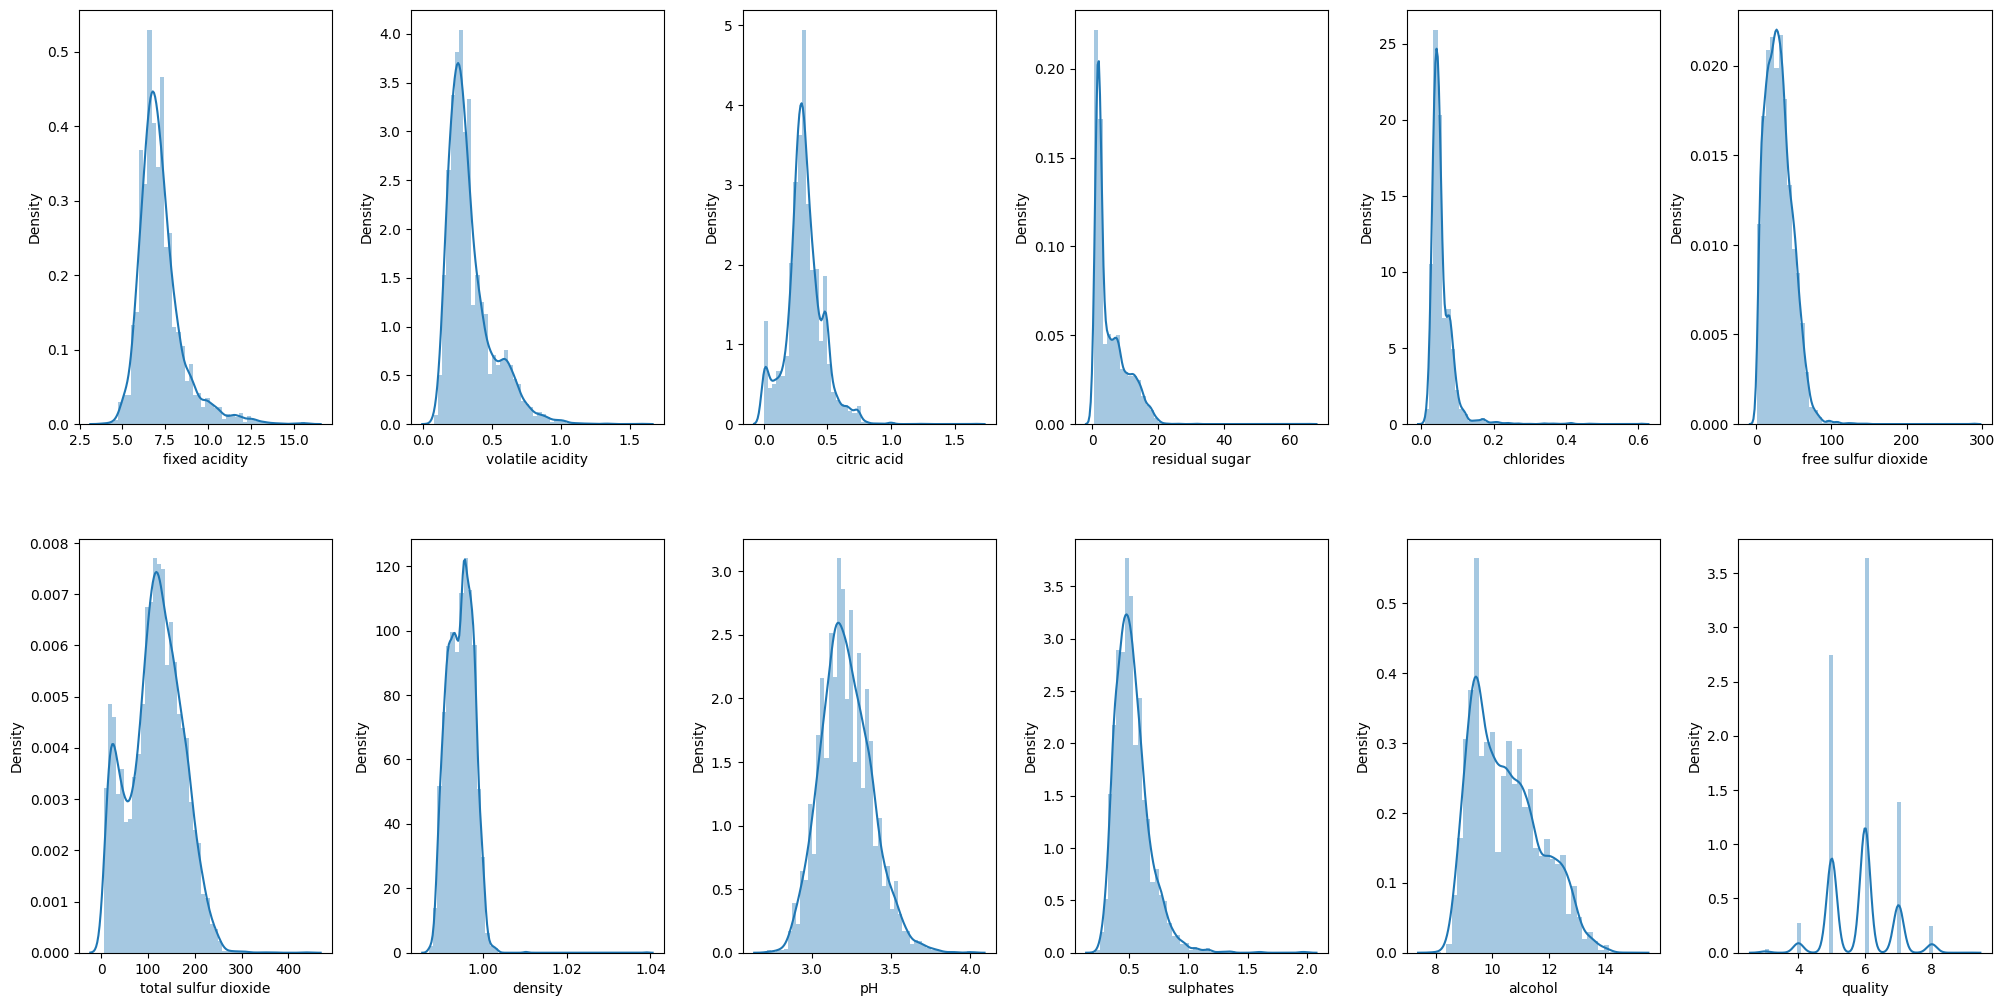

In [ ]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in data.items():
      sns.distplot(value, ax=ax[index])
      index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
# Transformation 1: log transformation on free sulfur dioxide because it is right-skewed
X = pd.read_csv('wine-data-set.csv')
X['free sulfur dioxide'] = np.log(1 + data['free sulfur dioxide'])

# input split
X = X.drop(columns=['quality']) # storing input in x
y = data['quality'] # storing output in y

# getting new accuracy
model = LogisticRegression()
classify(model, X, y)

Accuracy: 46.472772277227726


In [ ]:
# Transformation 2: Min-Max Scaler on all predictors
predictors = pd.read_csv('wine-data-set.csv').drop(columns=['quality'])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(predictors)

# getting new accuracy
model = LogisticRegression()
classify(model, X, y)

Accuracy: 54.02227722772277


In [ ]:
# Transformation 3: Standard Scaler on all predictors
predictors = pd.read_csv('wine-data-set.csv').drop(columns=['quality'])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(predictors)

# getting new accuracy
model = LogisticRegression()
classify(model, X, y)

Accuracy: 54.39356435643564


In [ ]:
# Transformation 4: MaxAbs Scaler on all data
predictors = pd.read_csv('wine-data-set.csv').drop(columns=['quality'])

from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X = scaler.fit_transform(predictors)

# getting new accuracy
model = LogisticRegression()
classify(model, X, y)

Accuracy: 53.58910891089109


In [ ]:
# Transformation 5: Robust Scaler on all data
predictors = pd.read_csv('wine-data-set.csv').drop(columns=['quality'])

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(predictors)

# getting new accuracy
model = LogisticRegression()
classify(model, X, y)

Accuracy: 54.39356435643564


**Highest accuracy: 54.39 with StandardScaler or RobustScaler on all predictors**

# Feature Selection

In [ ]:
# Our highest accuracy of 54.39 was achieved with the StandardScaler scaled dataset, so we continue using it here.
predictors = pd.read_csv('wine-data-set.csv').drop(columns=['quality'])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(predictors)

scaled_df = pd.DataFrame(scaled, columns=data.columns[:len(data.columns) - 1])
scaled_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.167786,-0.422710,0.283959,3.207420,-0.315228,0.815609,0.960779,2.099926,-1.359160,-0.544987,-1.418922
1,-0.707155,-0.240479,0.146257,-0.808151,-0.201180,-0.930138,0.288479,-0.232465,0.508399,-0.276354,-0.832184
2,0.679794,-0.361966,0.559363,0.306117,-0.172668,-0.029107,-0.330745,0.134053,0.259391,-0.612146,-0.329265
3,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905
4,-0.013681,-0.665684,0.008554,0.642500,0.055427,0.928238,1.243853,0.300653,-0.176373,-0.880779,-0.496905
...,...,...,...,...,...,...,...,...,...,...,...
6458,-0.321892,1.703315,-1.643871,-0.745079,0.340545,-0.141736,-1.374580,0.603864,1.255423,1.939871,-0.832184
6459,-0.784208,1.581828,-1.643871,-0.724055,0.967807,0.083522,-1.268427,0.067414,1.442179,0.328071,0.006014
6460,-0.707155,1.035136,-1.299616,-0.660984,0.568640,-0.085421,-1.339195,0.347301,1.255423,1.469762,0.425113
6461,-1.015366,1.855174,-1.368467,-0.724055,0.540129,0.083522,-1.268427,0.257337,2.189203,1.201129,-0.245446


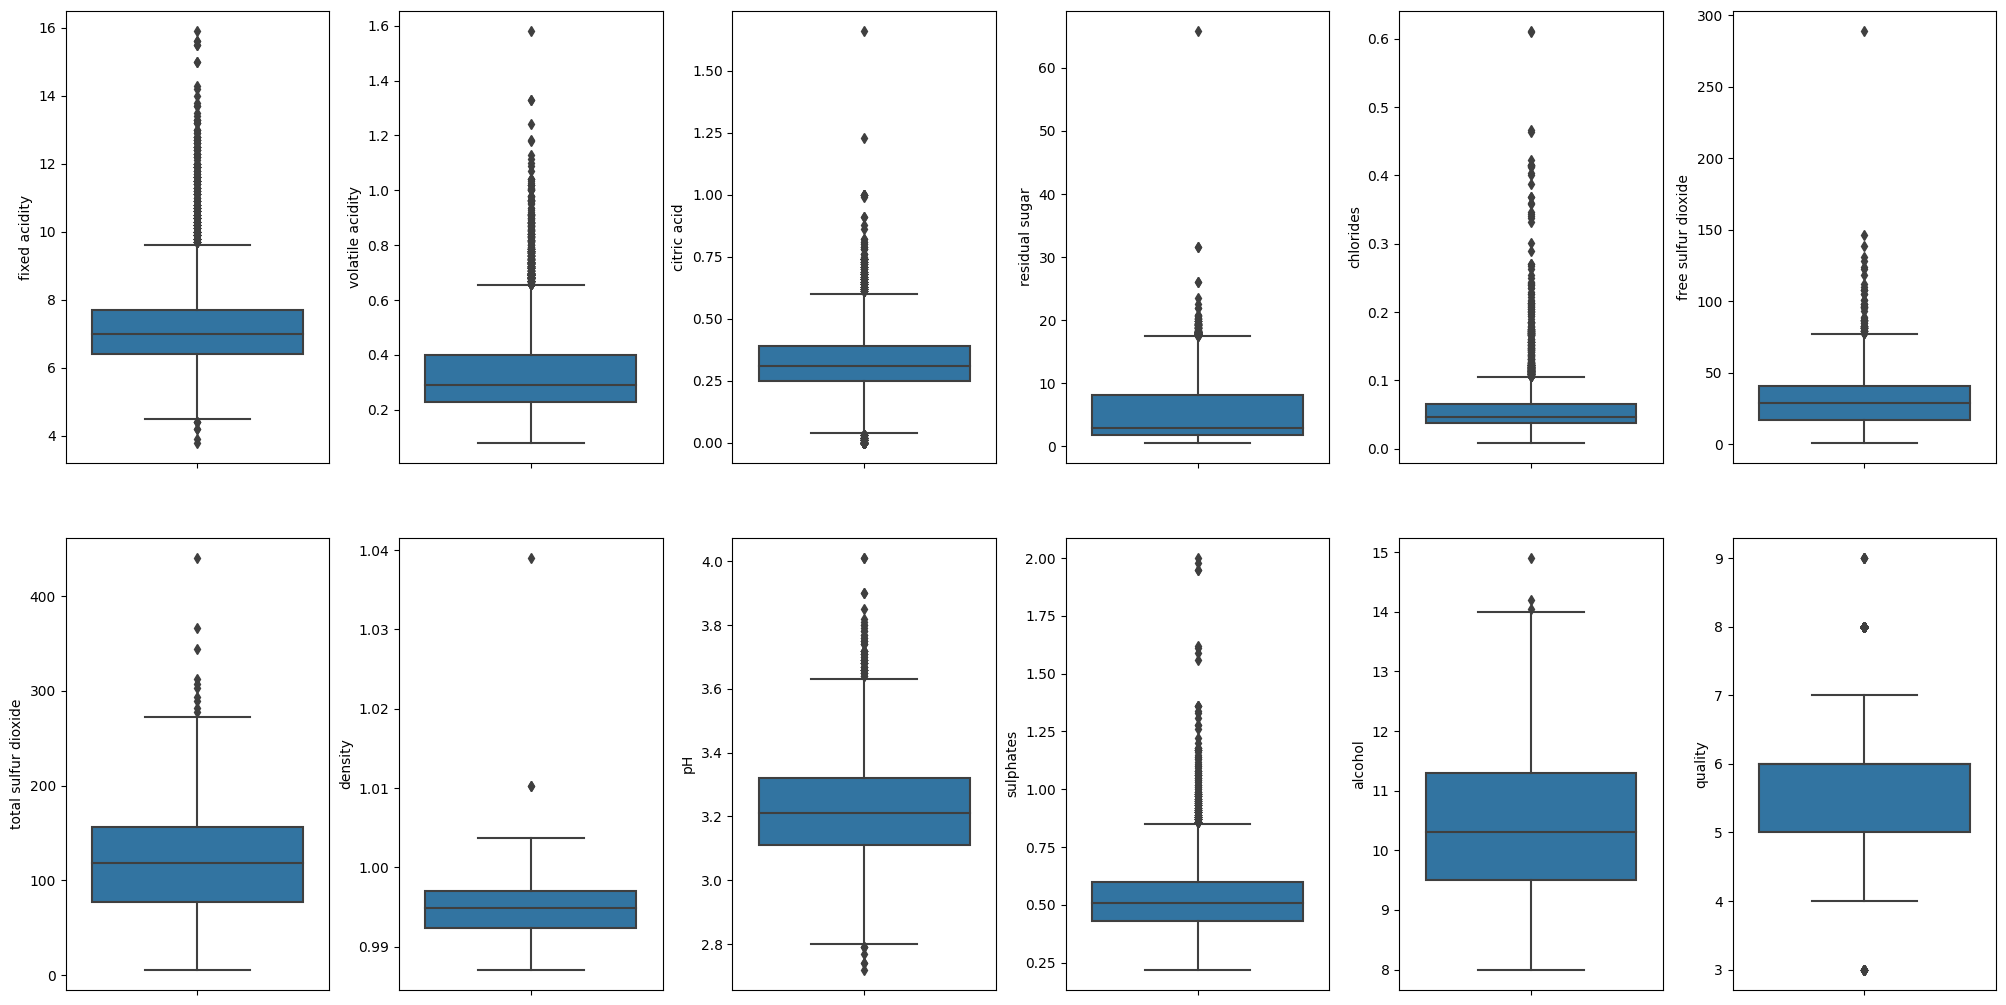

In [ ]:
# create box plots, to help inform our selection
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in data.items():
      sns.boxplot(y=col, data=data, ax=ax[index])
      index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
# Feature selection 1

# drop between 1 to 3 predictors
reduced = scaled_df.drop(columns=['citric acid'])
X = reduced

# build a Logistic Regression Model on the reduced dataset
# getting new accuracy
model = LogisticRegression()
classify(model, X, y)

# result: worse than current best accuracy

Accuracy: 53.898514851485146


In [ ]:
# Feature selection 2

# drop between 1 to 3 predictors
reduced = scaled_df.drop(columns=['chlorides'])
X = reduced

# build a Logistic Regression Model on the reduced dataset
# getting new accuracy
model = LogisticRegression()
classify(model, X, y)

# result: worse than current best accuracy

Accuracy: 53.960396039603964


In [ ]:
# Feature selection 3

# drop between 1 to 3 predictors
reduced = scaled_df.drop(columns=['fixed acidity'])
X = reduced

# build a Logistic Regression Model on the reduced dataset
# getting new accuracy
model = LogisticRegression()
classify(model, X, y)

# result: worse than current best accuracy

Accuracy: 53.71287128712871


In [ ]:
# Feature selection 4

# drop between 1 to 3 predictors
reduced = scaled_df.drop(columns=['density'])
X = reduced

# build a Logistic Regression Model on the reduced dataset
# getting new accuracy
model = LogisticRegression()
classify(model, X, y)

# result: this one is closest to the best accuracy, but still worse than it

Accuracy: 54.146039603960396


In [ ]:
# Feature selection 5

# drop between 1 to 3 predictors
reduced = scaled_df.drop(columns=['sulphates'])
X = reduced

# build a Logistic Regression Model on the reduced dataset
# getting new accuracy
model = LogisticRegression()
classify(model, X, y)

# result: worse than best accuracy

Accuracy: 54.02227722772277


# 2 more experiments

In [ ]:
# Experiment 11: apply power transform to all predictors of original dataset

from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')
X = transformer.fit_transform(predictors)

# getting new accuracy
model = LogisticRegression()
classify(model, X, y)

# result: worse than current best

Accuracy: 53.0940594059406


In [ ]:
# Experiment 12: apply log transform to all predictors
t = data.drop(columns=['quality'])

for col in t.keys():
    t[col] = np.log(1 + t[col])

# getting new accuracy
X = t
model = LogisticRegression()
classify(model, X, y)

# result: worse than current best

Accuracy: 51.918316831683164
